In [1]:
import MagmaPandas.geochemistry.volatile_solubility.IaconoMarziano as im
im_config = im.IaconoMarziano_configuration()
im_config.parameters = "hydrous_webapp"
im_config.print()

Settings________________________________
Parameterisation..........hydrous_webapp
Fugacity model.....................ideal
Activity model.....................ideal
Species model......................mixed

Calibration range______________________
Temperature..................1373-1673°K
Pressure.....................0.1-10 kbar


In [2]:
# import pandas as pd
import MagmaPandas as mp
import MagmaPandas.parse.readers as r
import pandas as pd
import elements as e
import numpy as np
import matplotlib.pyplot as plt
import VESIcal as v
config = mp.configuration()

c:\Users\u0123694\miniforge3\envs\py38\lib\site-packages\VESIcal\calculate_classes.py:7: UserWarning: 

  from VESIcal.models import magmasat


In [14]:
melt = mp.read_melt_inclusion('./melt.csv', index_col=['name'], total_col='total')

In [15]:
sample = "PI052-02-01"
FeO_initial = 15
Fo_host = 0.6
Kd = 0.29
P_bar = 1e3
T_K = 1400
inclusion = melt.iloc[4,:].copy()
# inclusion["H2O"] = 5


In [16]:
# inclusion = inclusion.drop(["F", "S", "Cl"]).recalculate()
inclusion.weights

SiO2      60.084
Al2O3    101.961
MgO       40.304
CaO       56.077
FeO       71.844
Na2O      61.979
K2O       94.195
MnO       70.937
TiO2      79.865
P2O5     141.943
Cr2O3    151.989
CO2       44.008
H2O       18.019
F         18.998
S         32.065
Cl        35.453
Name: weight, dtype: float64

In [6]:
IM_oxideMasses = {
            "Al2O3": 101.96,
            "CaO": 56.08,
            "FeO": 71.85,
            "K2O": 94.2,
            "MgO": 40.32,
            "Na2O": 61.98,
            "SiO2": 60.09,
            "TiO2": 79.9,
            "H2O": 18.01,
        }

In [9]:
me = inclusion.moles

In [10]:
s = v.Sample(inclusion[inclusion.index.intersection(v.oxides)])
s.get_composition()

SiO2     47.851799
Al2O3    15.871700
MgO       7.863920
CaO      10.468700
FeO       8.851050
Na2O      3.148020
K2O       1.180670
MnO       0.098343
TiO2      3.431850
P2O5      0.598803
Cr2O3          NaN
CO2       0.357400
H2O       1.046258
dtype: float32

In [11]:
print(im.NBO_O_calculate(inclusion.moles), v.models.iaconomarziano.water().NBO_O(s, coeffs="webapp"))

0.33961636053524036 0.33958904157577674


In [17]:
for idx in range(20):

    inclusion = melt.iloc[idx,:].copy()
    s = v.Sample(inclusion[inclusion.index.intersection(v.oxides)])
    model = "IaconoMarziano"
    VC = v.calculate_saturation_pressure(s, temperature=T_K, model=model).result
    me = im.calculate_saturation(inclusion, T_K)
    print(f"VESIcal: {VC:<30} me: {me:>25}, delta: {(VC - me): .0f} bar")

VESIcal: 1135.0819765844035             me:        1107.7874597993034, delta:  27 bar
VESIcal: 980.9671966994213              me:         959.9956446178064, delta:  21 bar
VESIcal: 2697.319412478516              me:         2569.746491286821, delta:  128 bar
VESIcal: 3550.6968582982827             me:         3539.831729917701, delta:  11 bar
VESIcal: 4161.32557550735               me:         3936.385122545884, delta:  225 bar
VESIcal: 1705.9411018490598             me:        1651.7880720073622, delta:  54 bar
VESIcal: 2065.4855287788396             me:        1989.9578444632941, delta:  76 bar
VESIcal: 2155.119685850898              me:        2075.4150558608762, delta:  80 bar
VESIcal: 3189.999238225935              me:        3036.6759980311454, delta:  153 bar
VESIcal: 2033.9987248521838             me:        1964.6640546659467, delta:  69 bar
VESIcal: 2865.2959249451137             me:         2748.566581631606, delta:  117 bar
VESIcal: 2541.5411238324036             me:       

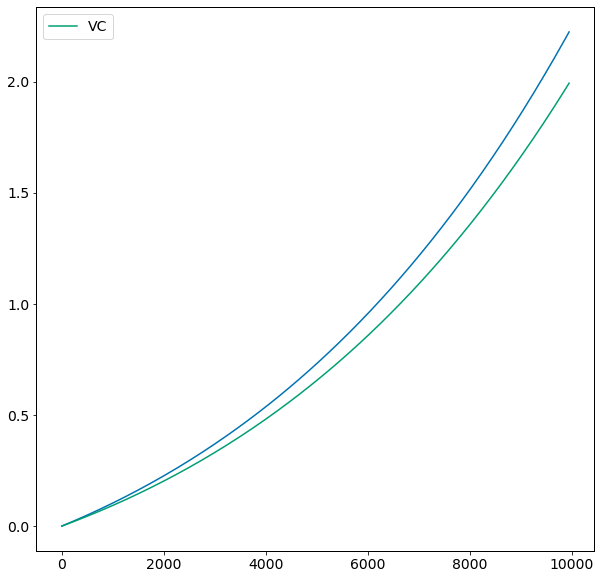

In [37]:
model = "IaconoMarzianoCarbon"

p = np.arange(1,  1e4, 5e1)
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(p, [im.co2.calculate_solubility(inclusion, P_bar=i, T_K=T_K) for i in p])
plt.plot(p, [v.calculate_dissolved_volatiles(s, temperature=T_K-273.15, pressure=i, model=model).result for i in p], label="VC")

plt.legend()
plt.show()